[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_tensorflow.ipynb)

## 0. Preperation

- Install latest version of SAHI and Tensorflow:

In [ ]:
!pip install git+https://github.com/kadirnar/sahi.git@tfhub
!pip install tensorflow
!pip install tensorflow_hub

In [ ]:
import os
os.getcwd()

- Import required modules:

In [2]:
# import required functions, classes
from sahi.model import TensorflowhubDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [3]:
# set tensorflow efficientdet model 
model_path = "https://tfhub.dev/tensorflow/efficientdet/d0/1"

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Tensorflow Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [18]:
detection_model = TensorflowhubDetectionModel(
    model_path=model_path,
    config_path=model_path,
    confidence_threshold=0.3,
    image_size=640,
    device="cpu", # or 'GPU'
)

06/20/2022 13:25:00 - WARNING - absl -   Importing a function (__inference___call___32344) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:06 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_97451) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:09 - WARNING - absl -   Importing a function (__inference_bifpn_layer_call_and_return_conditional_losses_77595) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:10 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_103456) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:13 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_93843) with ops with unsaved 

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [19]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [20]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

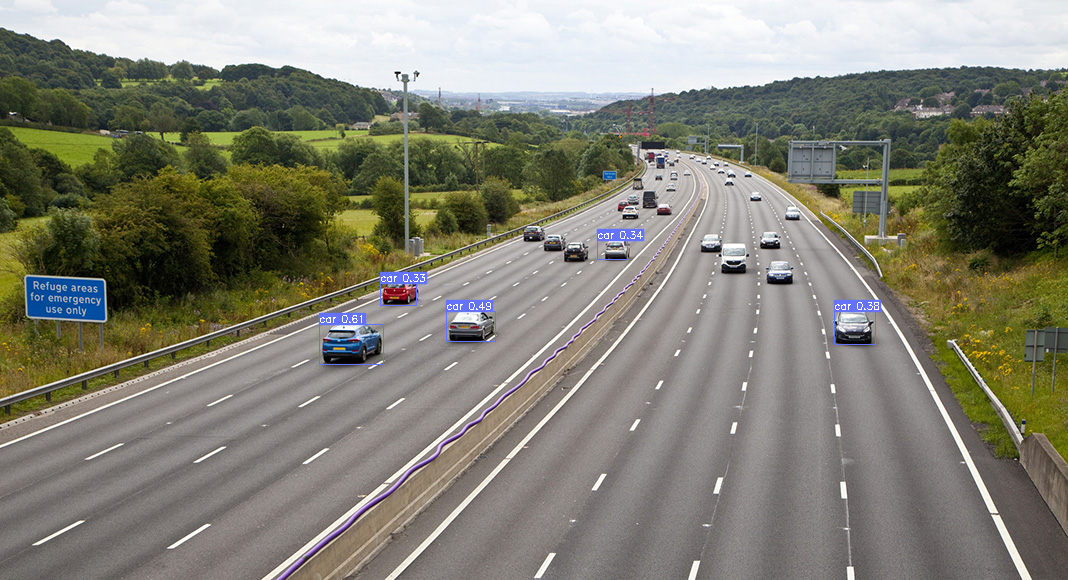

In [21]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Detectron2 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [22]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

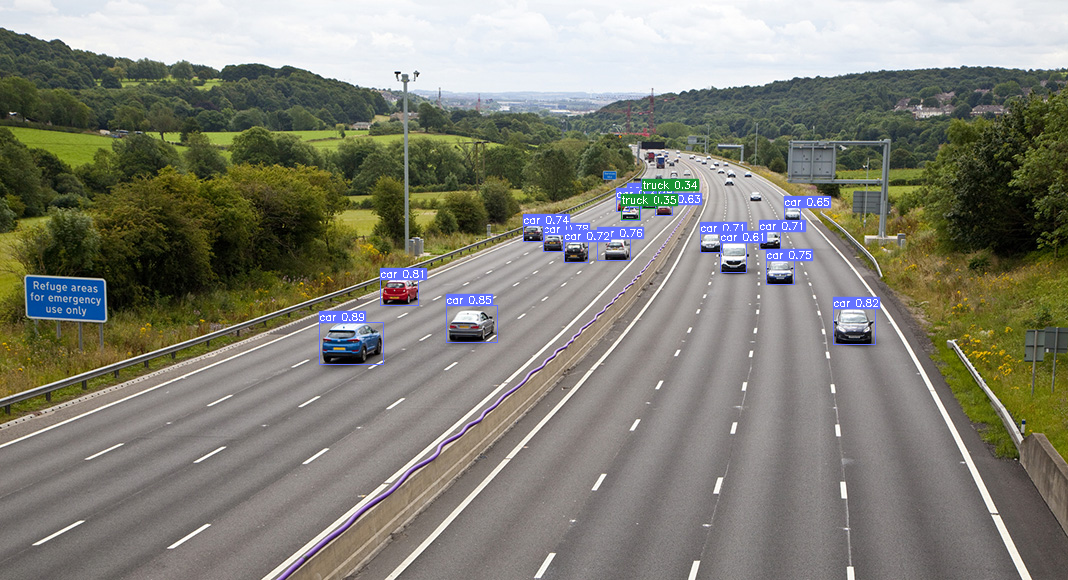

In [23]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [24]:
object_prediction_list = result.object_prediction_list

In [25]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(319, 322, 383, 364), w: 64, h: 42>,
    mask: None,
    score: PredictionScore: <value: 0.885943591594696>,
    category: Category: <id: 3, name: car>>

In [26]:
result.to_coco_annotations()[:3]

[{'area': 2688,
  'bbox': [319, 322, 64, 42],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.885943591594696,
  'segmentation': []},
 {'area': 1887,
  'bbox': [446, 305, 51, 37],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.8473458886146545,
  'segmentation': []},
 {'area': 1512,
  'bbox': [833, 308, 42, 36],
  'category_id': 3,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.8198030591011047,
  'segmentation': []}]

In [27]:
result.to_coco_predictions(image_id=1)[:3]

[{'area': 2688,
  'bbox': [319, 322, 64, 42],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.885943591594696,
  'segmentation': []},
 {'area': 1887,
  'bbox': [446, 305, 51, 37],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8473458886146545,
  'segmentation': []},
 {'area': 1512,
  'bbox': [833, 308, 42, 36],
  'category_id': 3,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8198030591011047,
  'segmentation': []}]

In [28]:
!pip install -U imantics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [30]:
model_type = "tensorflow"
model_config_path = model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [31]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


06/20/2022 13:25:48 - WARNING - absl -   Importing a function (__inference___call___32344) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:53 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_97451) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:56 - WARNING - absl -   Importing a function (__inference_bifpn_layer_call_and_return_conditional_losses_77595) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:25:58 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_103456) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
06/20/2022 13:26:02 - WARNING - absl -   Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_93843) with ops with unsaved 

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:09<00:18,  9.07s/it]

Prediction time is: 8997.33 ms
Performing prediction on 20 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:15<00:07,  7.74s/it]

Prediction time is: 6743.35 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:22<00:00,  7.42s/it]


Prediction time is: 6317.90 ms
Prediction results are successfully exported to runs/predict/exp2
